In [62]:
import matplotlib.pyplot as pl
import numpy as np
import glob
import h5py
from tqdm import tqdm
from matplotlib.colors import LogNorm

In [79]:
def plot_collage(image_folder,N_rows=1,N_cols=1,vmin=None,vmax=None):
    np.random.seed(1)
    N_images = int(N_rows*N_cols)
    image_npy_list = glob.glob(f'{image_folder}/*.npy')
    image_h5_list = glob.glob(f'{image_folder}/*.h5')
    image_jpeg_list = glob.glob(f'{image_folder}/*.jpeg')
    if len(image_npy_list)>0:
        print('Plotting from npy files')
        random_indx = np.random.choice(np.arange(len(image_npy_list)),replace=False,size=N_images)
        image_list = [np.load(image_npy_list[random_indx[n_im]]) for n_im in range(N_images)]
    elif len(image_h5_list)>0:
        print('Plotting from h5 files')
        assert len(image_h5_list)==1 #There should only be one h5 file in the folder
        with h5py.File(image_h5_list[0],'r') as f0:
            number_of_files = f0['data'].shape[0]
            h5_file_array = f0['data'][()]
            random_indx = np.random.choice(np.arange((number_of_files)),replace=False,size=N_images)
            image_list = [h5_file_array[random_indx[n_im]] for n_im in tqdm(range(N_images))]
    elif len(image_jpeg_list)>0:
        print('Plotting from jpeg files')
        random_indx = np.random.choice(np.arange(len(image_jpeg_list)),replace=False,size=N_images)
        print(image_jpeg_list[random_indx[0]])
        image_list = [mpimg.imread(image_jpeg_list[random_indx[n_im]]) for n_im in tqdm(range(N_images))]
    fig,ax = pl.subplots(N_rows,N_cols)#,figsize=(N_cols,N_rows))
    for n_im in range(N_images):
        x = n_im%N_rows
        y = np.floor(n_im/N_rows).astype('int')
        ax[x,y].imshow(image_list[n_im],vmin=vmin,vmax=vmax)
        #Remove axis ticks:
        ax[x,y].xaxis.set_tick_params(labelbottom=False)
        ax[x,y].yaxis.set_tick_params(labelleft=False)
        # Hide X and Y axes tick marks
        ax[x,y].set_xticks([])
        ax[x,y].set_yticks([])
    pl.tight_layout()
    pl.show()

In [50]:
from load_h5_file import load_h5_file
#v1 = load_h5_file('/mnt/extraspace/hollowayp/paltas_data/Example_LP_14/validation/1/')
np.min(v1),np.median(v1),np.max(v1),np.percentile(v1,99)

(-9.586135774414288,
 0.010728394392950424,
 3582.845375289699,
 1.8236433695689307)

In [93]:
10**(np.log10(300)+0.05)

336.60553629058904

Plotting from h5 files


100%|██████████| 25/25 [00:00<00:00, 195629.85it/s]


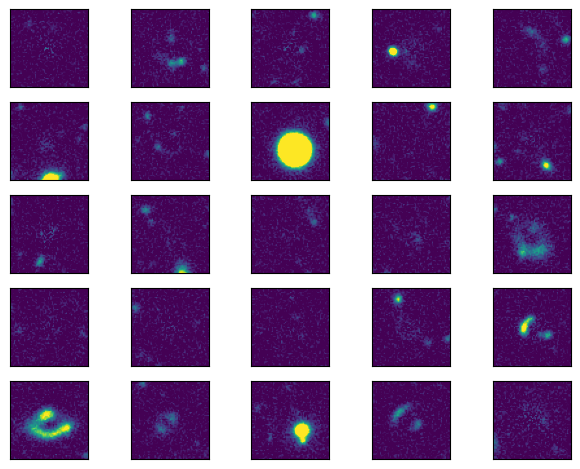

In [80]:
#from plot_image_collage import plot_collage
plot_collage('/mnt/extraspace/hollowayp/paltas_data/Example_LP_14/validation/1/',5,5,vmin=0,vmax=2)

Plotting from npy files


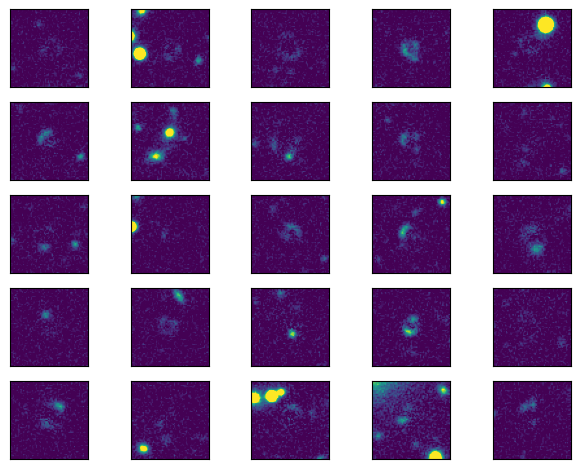

In [81]:
plot_collage('/mnt/extraspace/hollowayp/paltas_data/Example_LP_14/test/',5,5,vmin=0,vmax=2)

/tmp/ipykernel_45403/1960903866.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,ax = pl.subplots(1,4,figsize=(20,5))


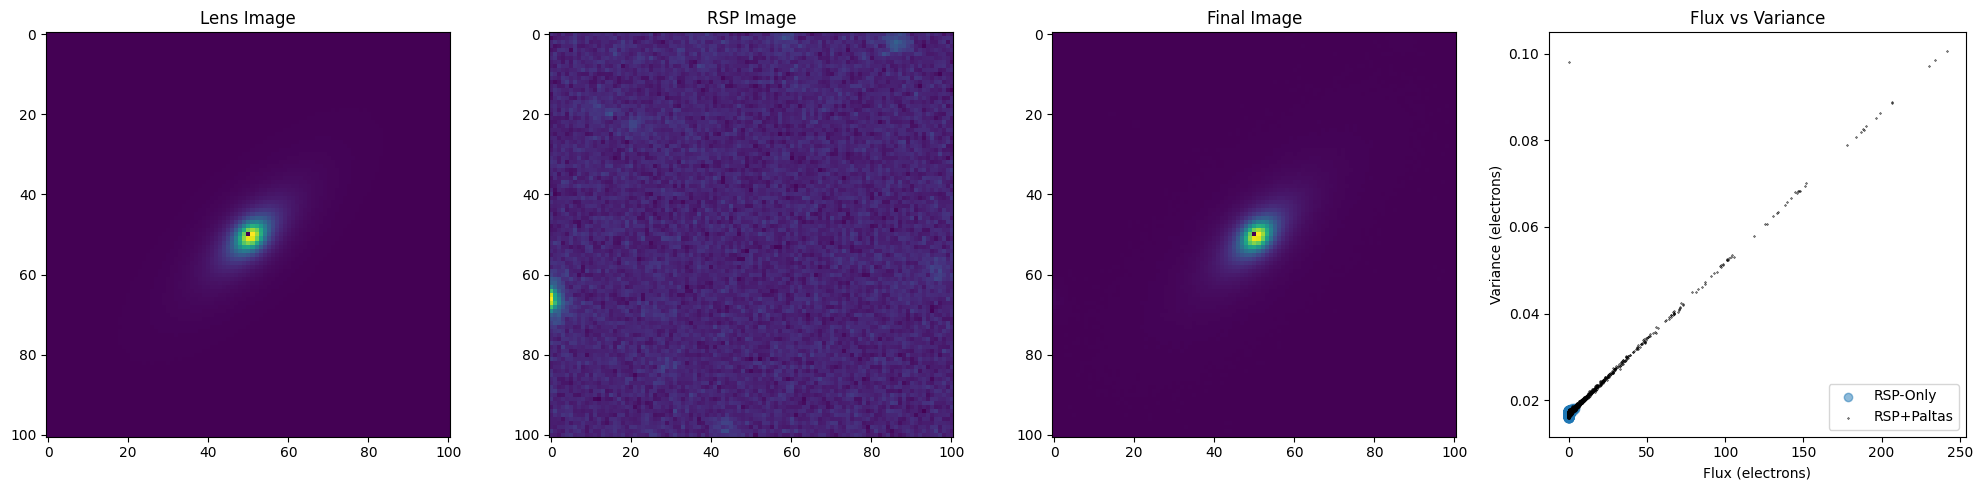

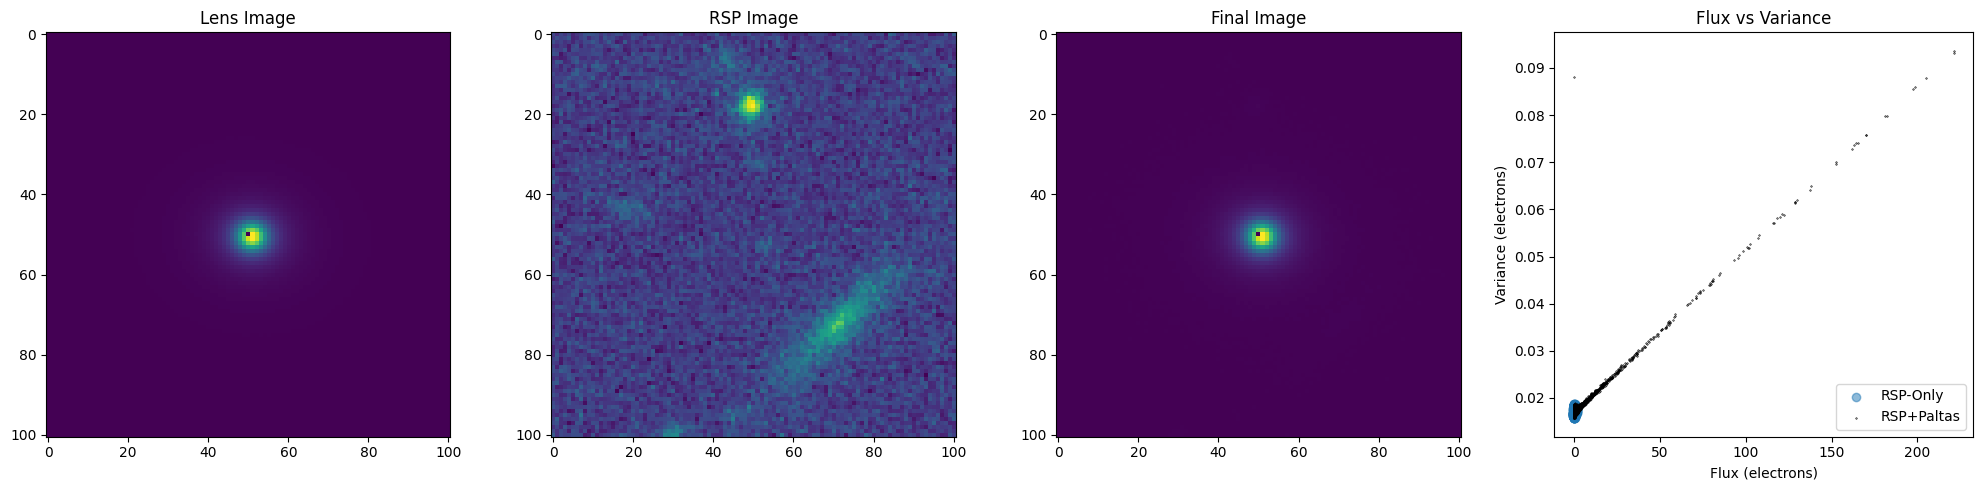

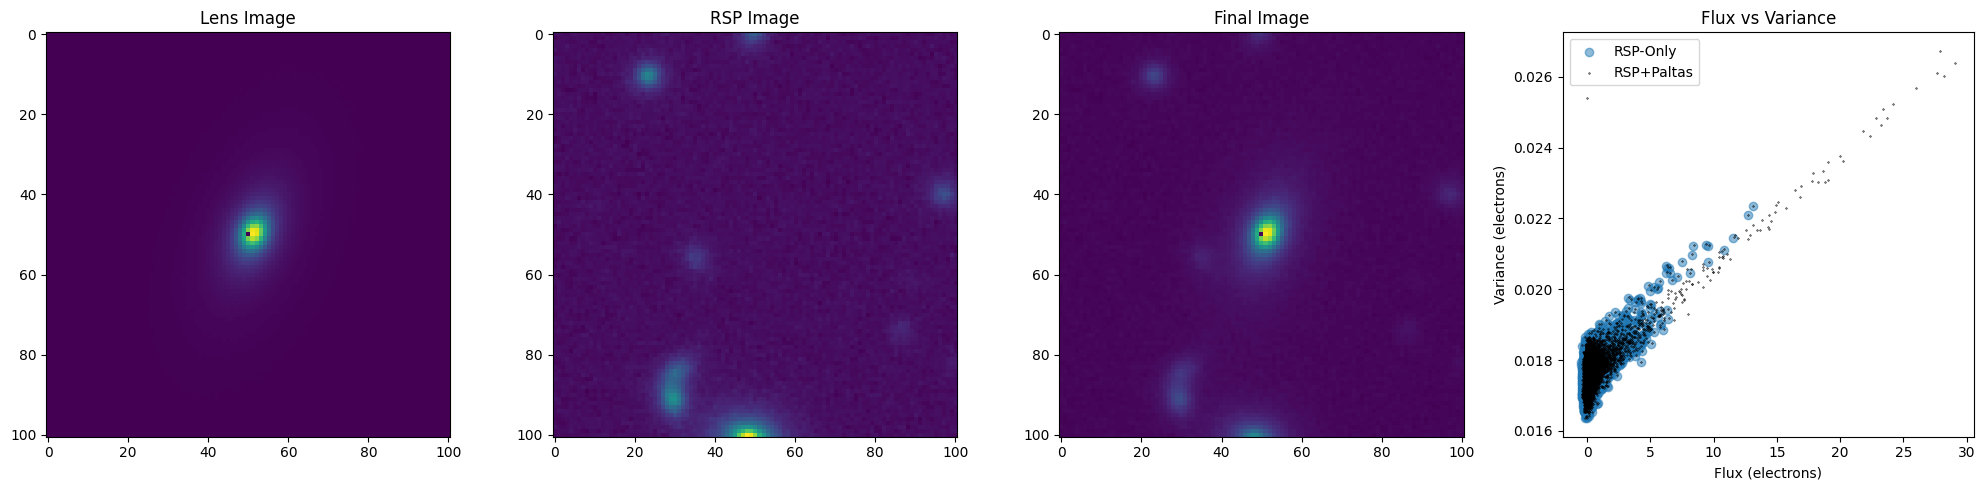

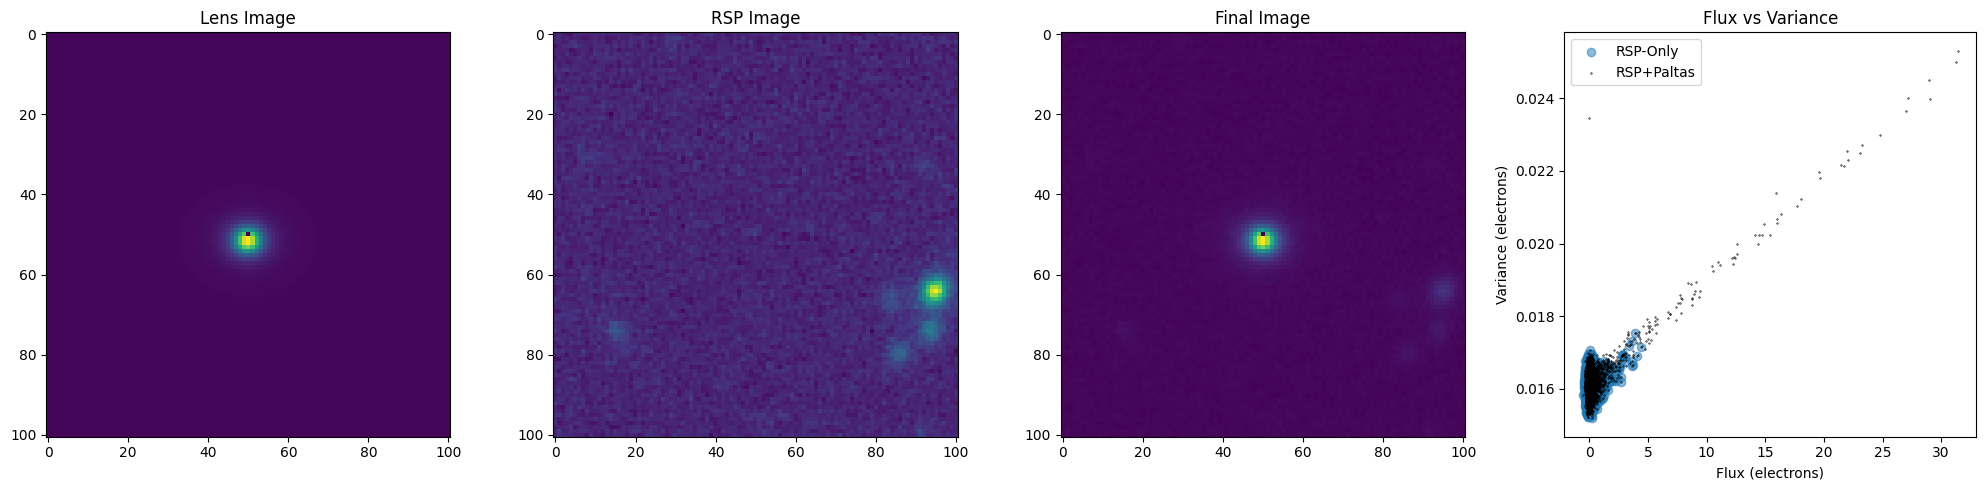

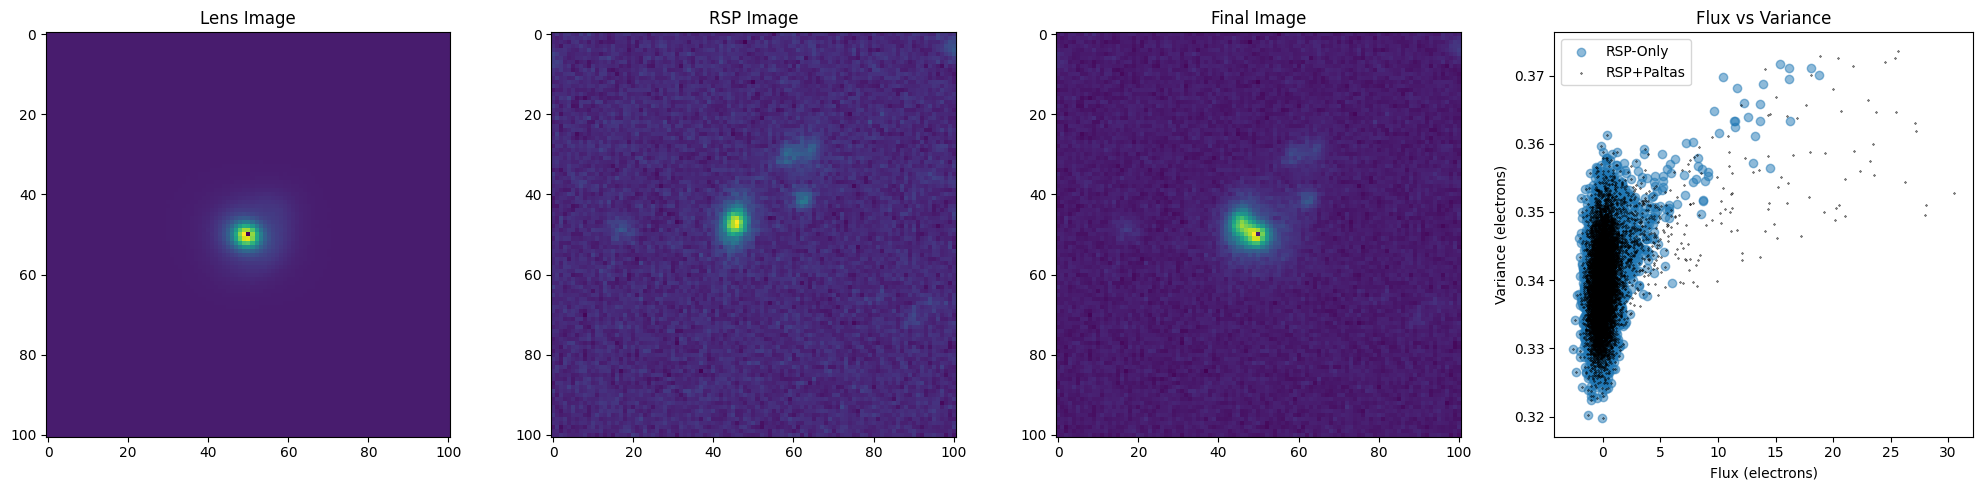

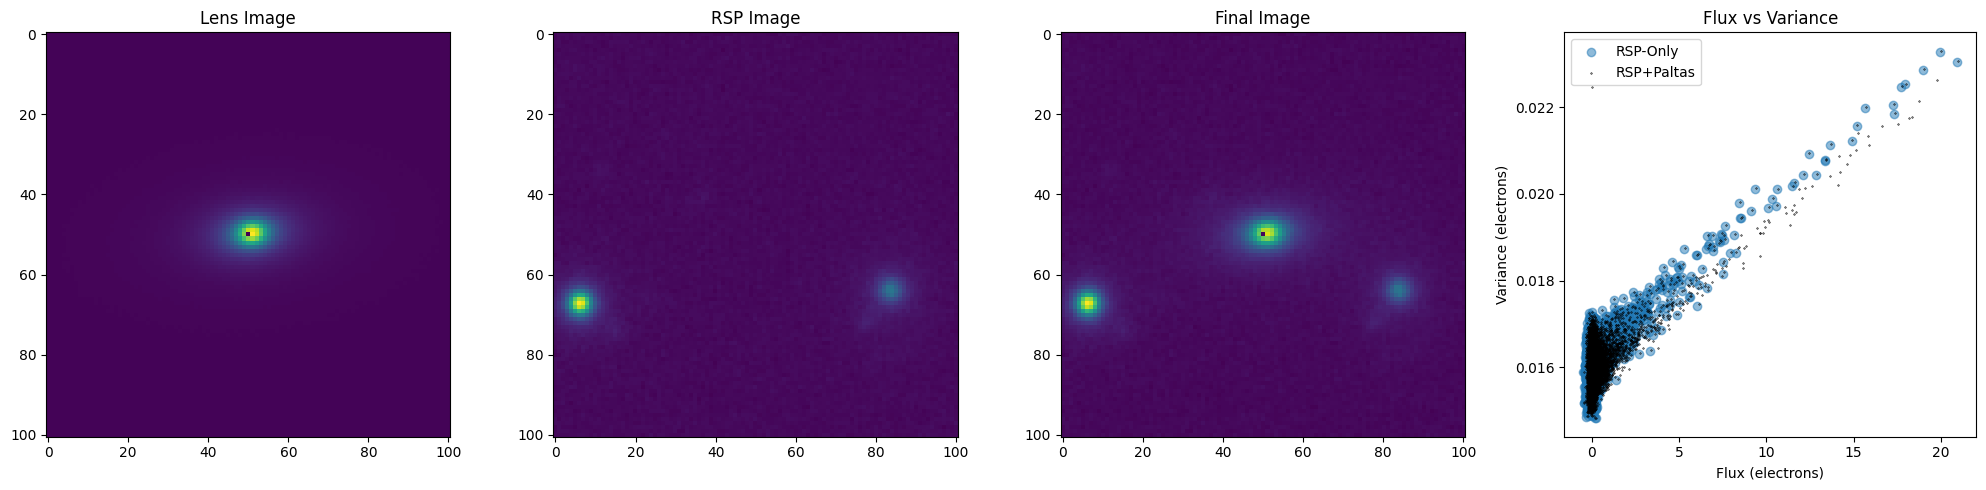

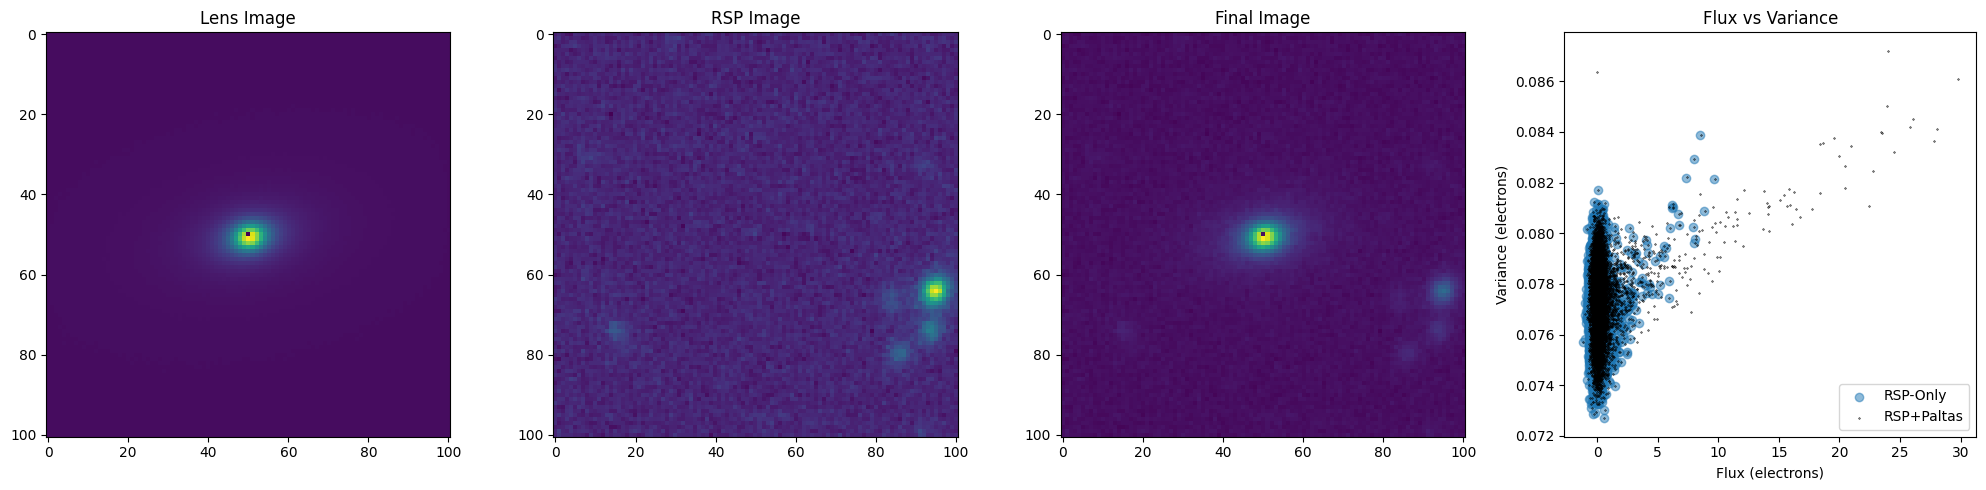

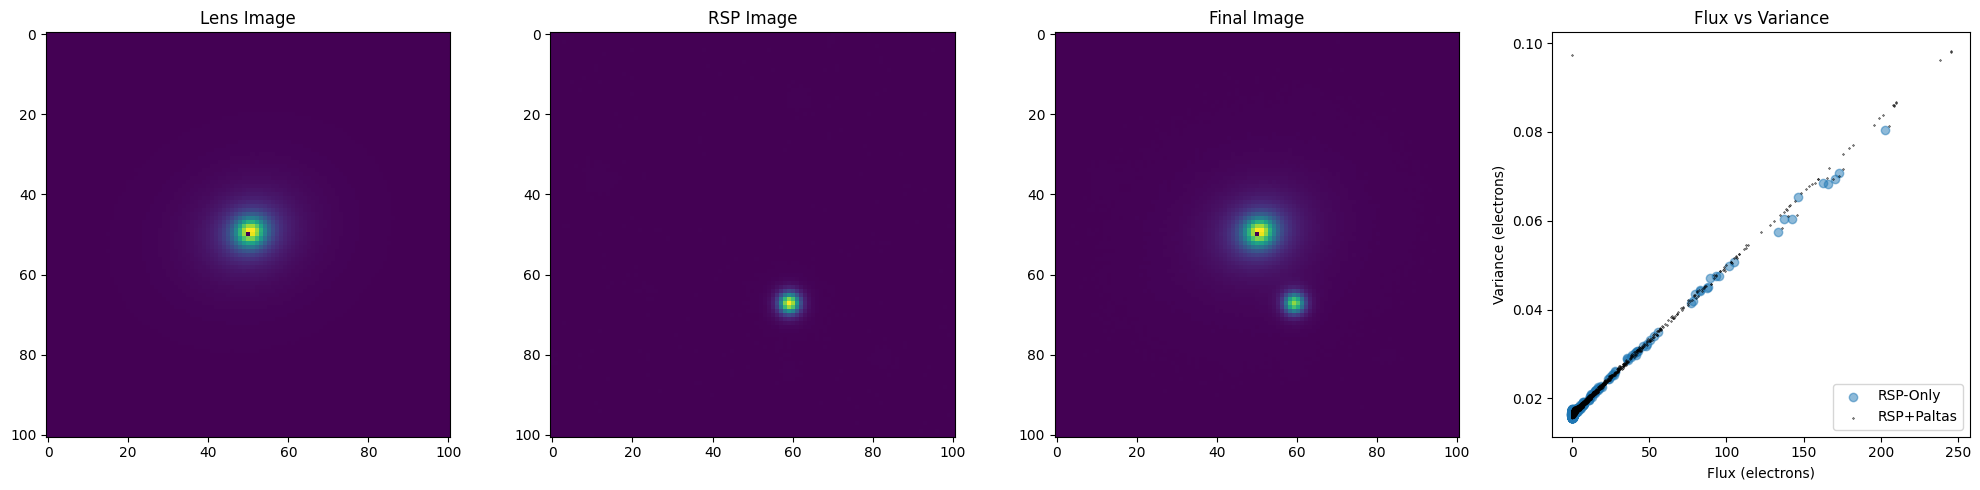

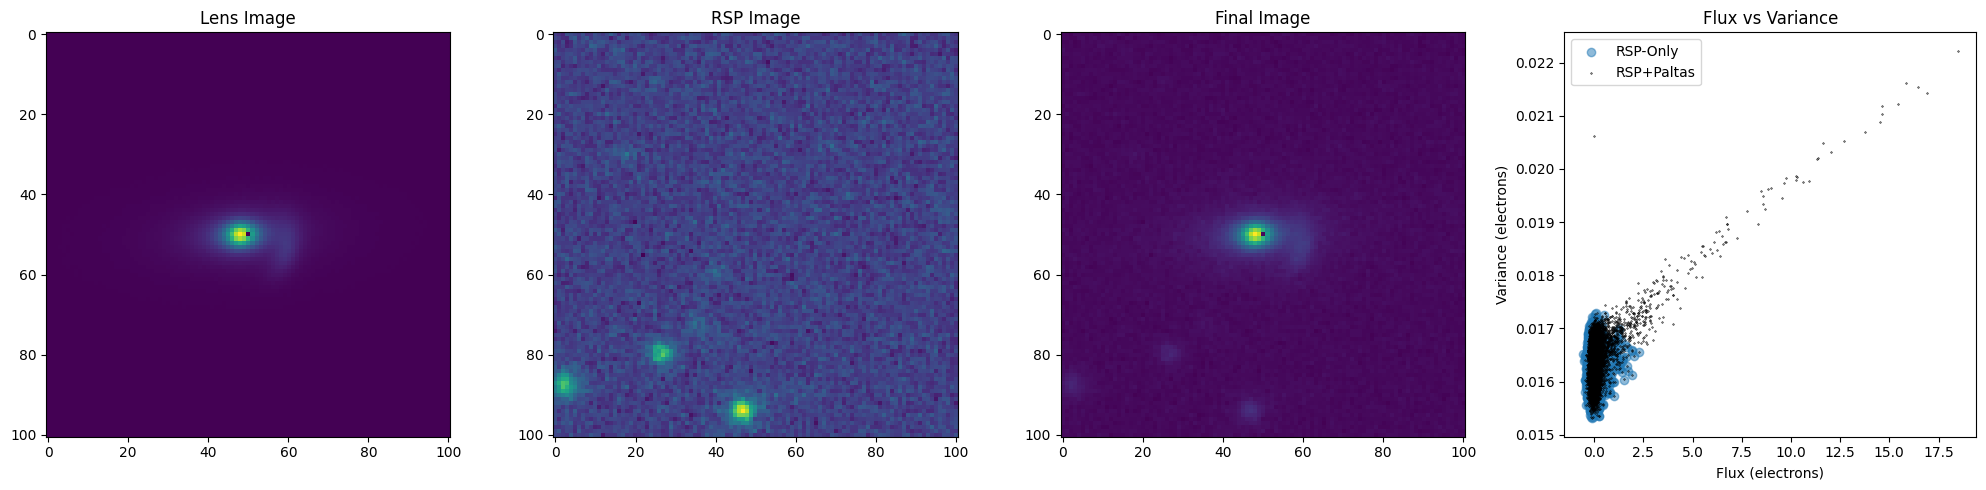

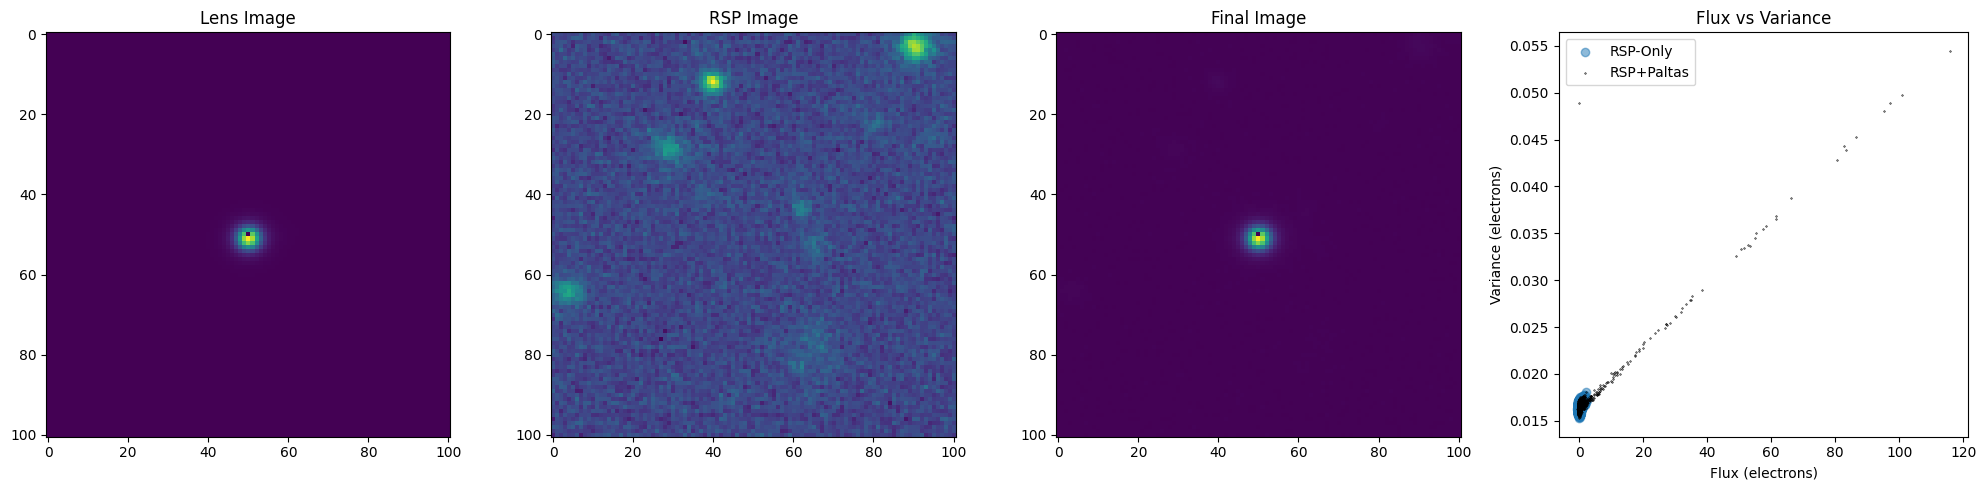

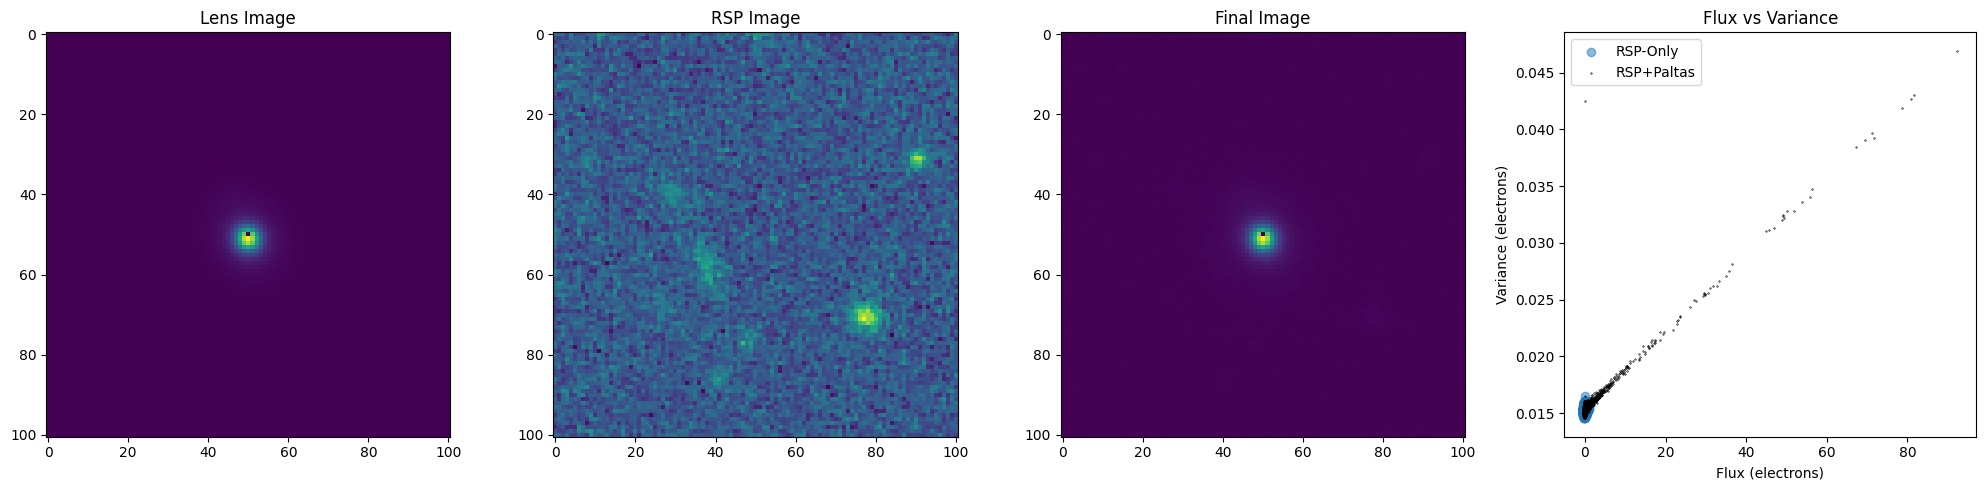

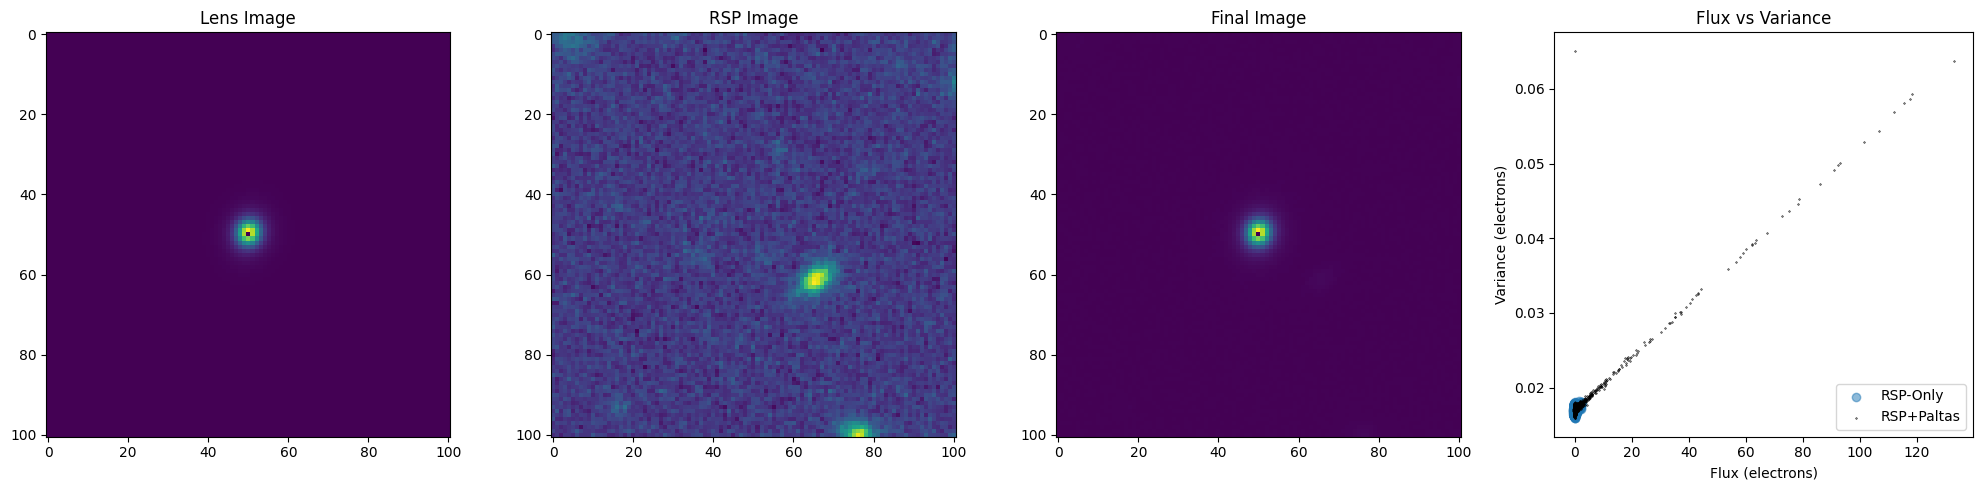

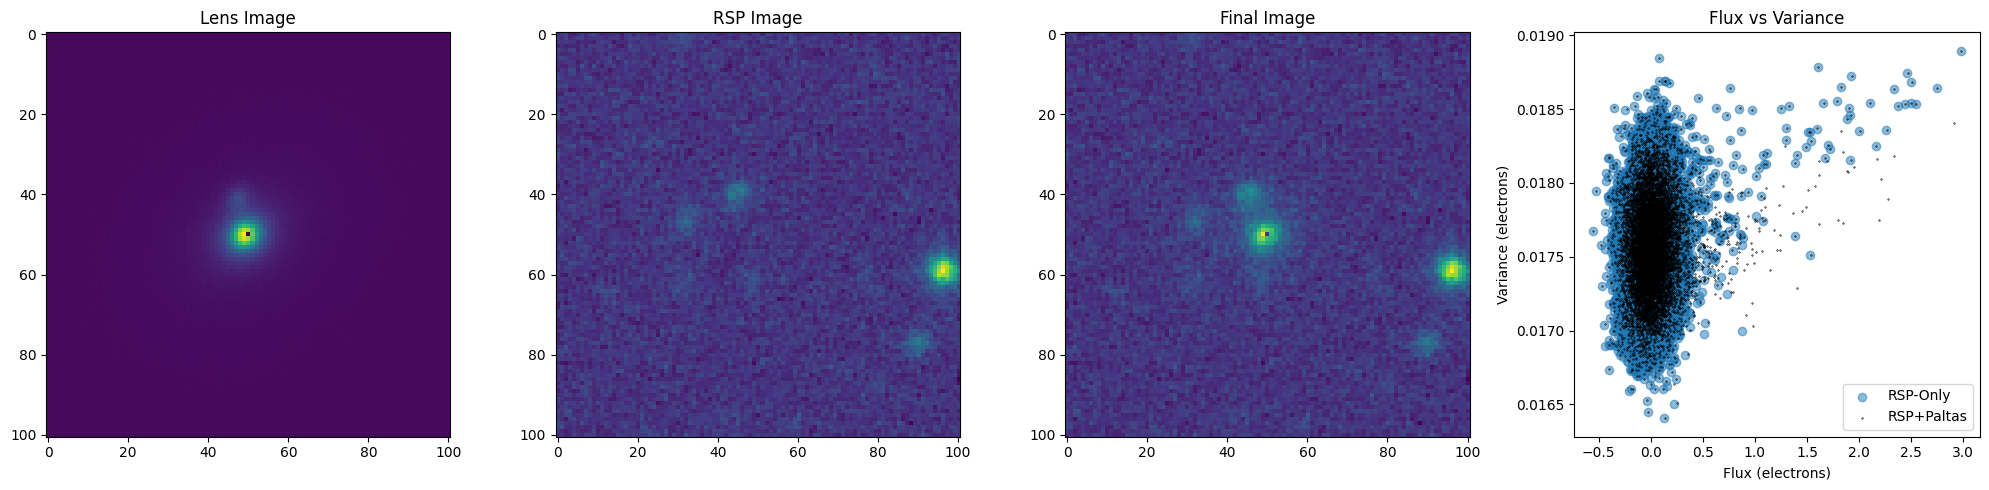

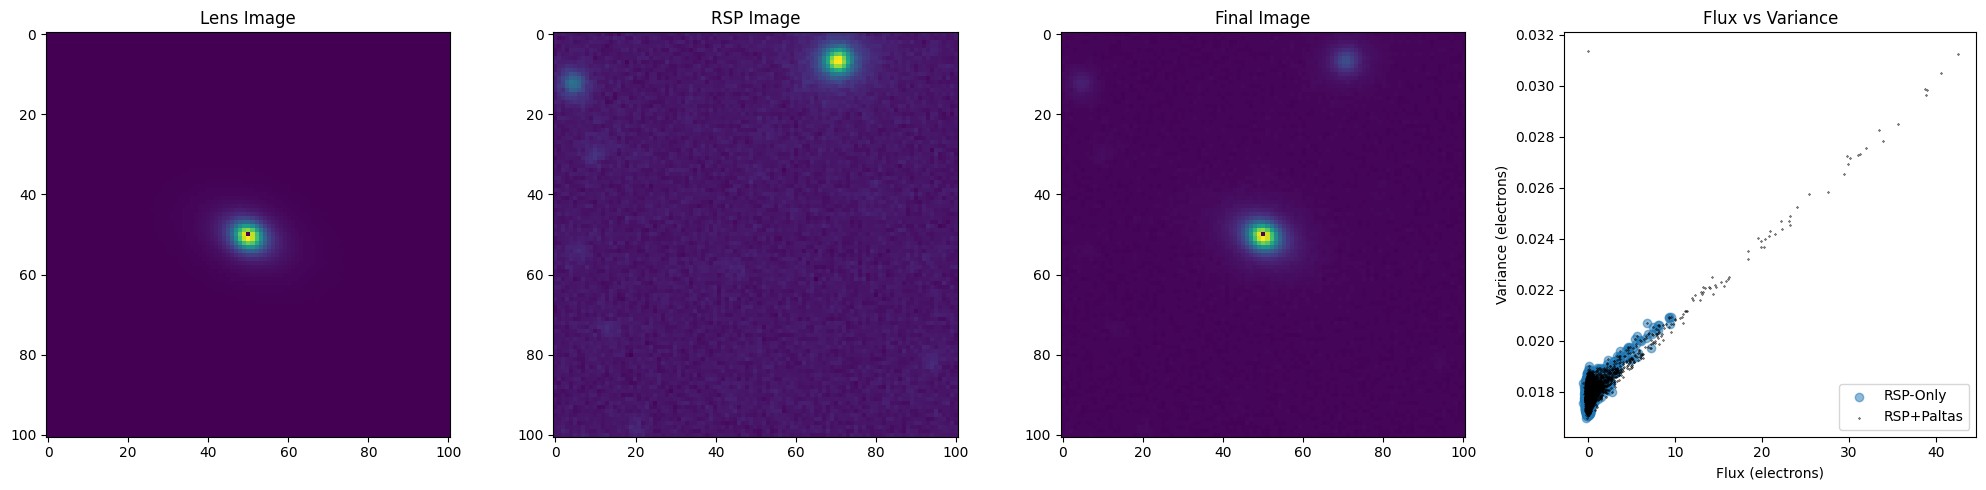

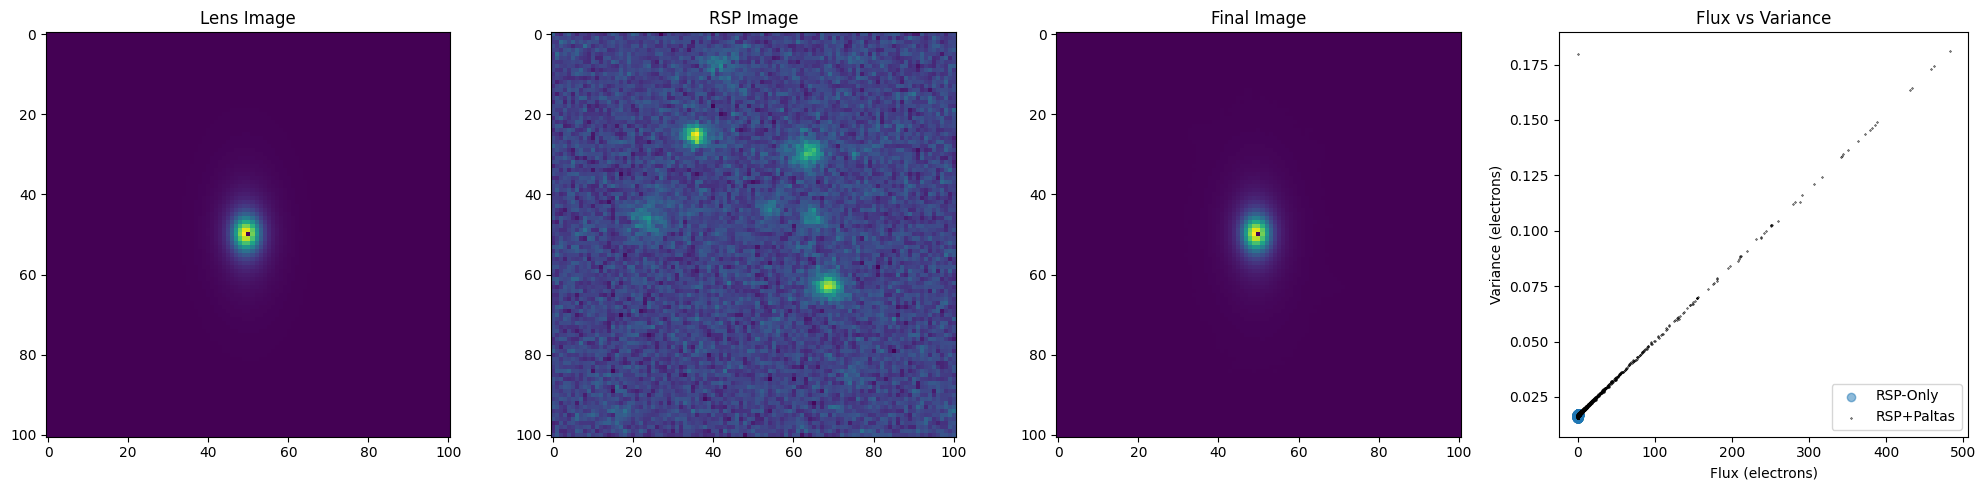

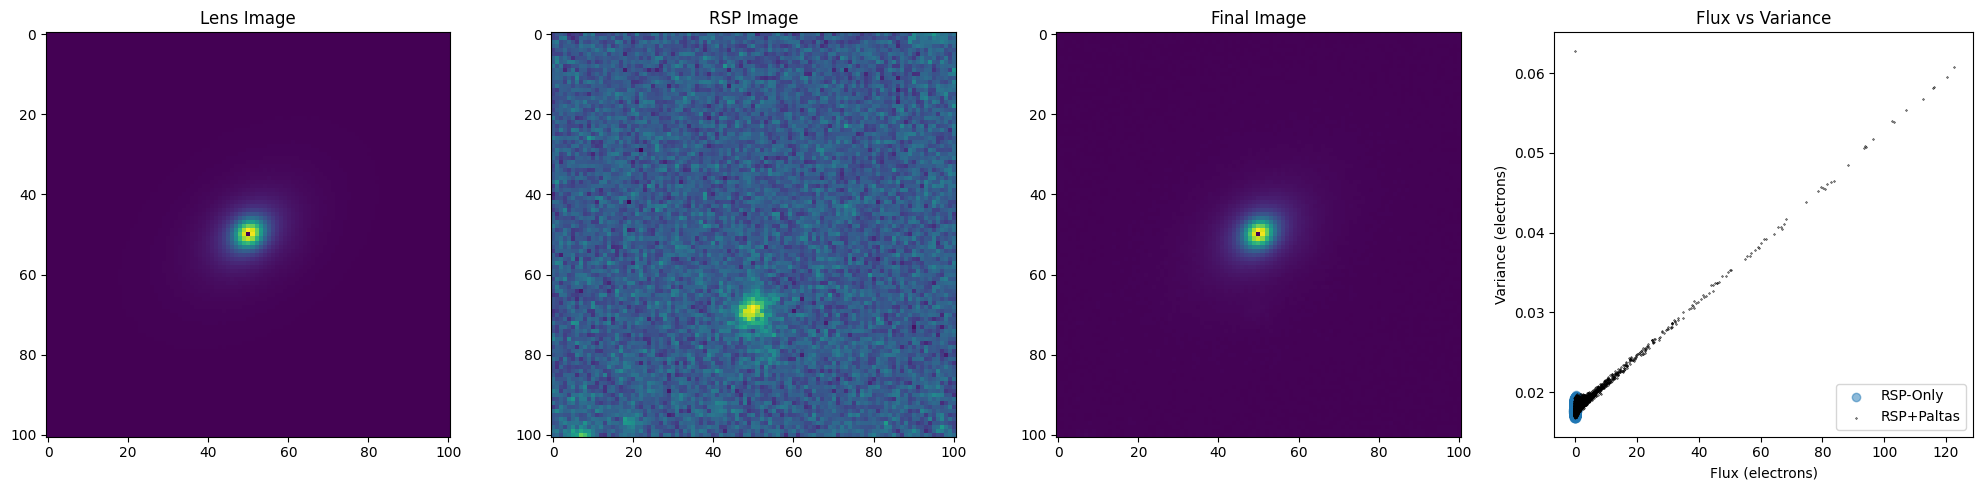

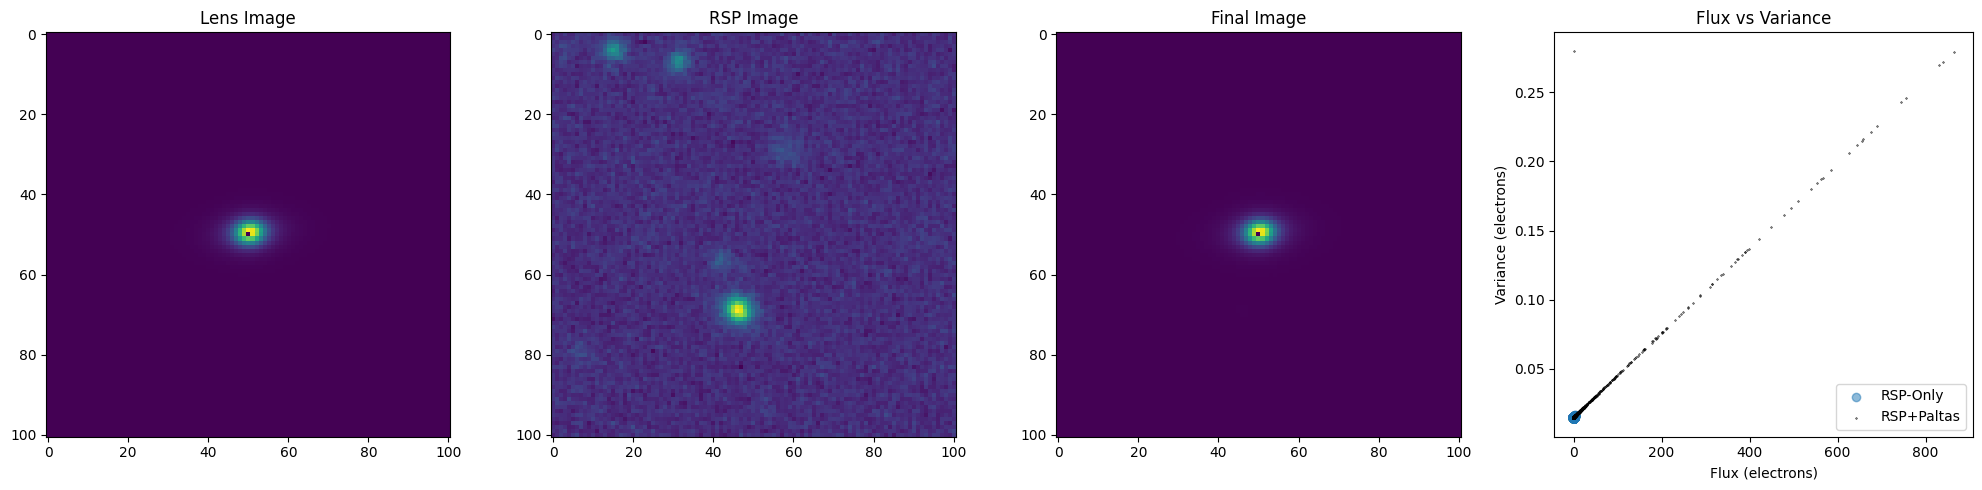

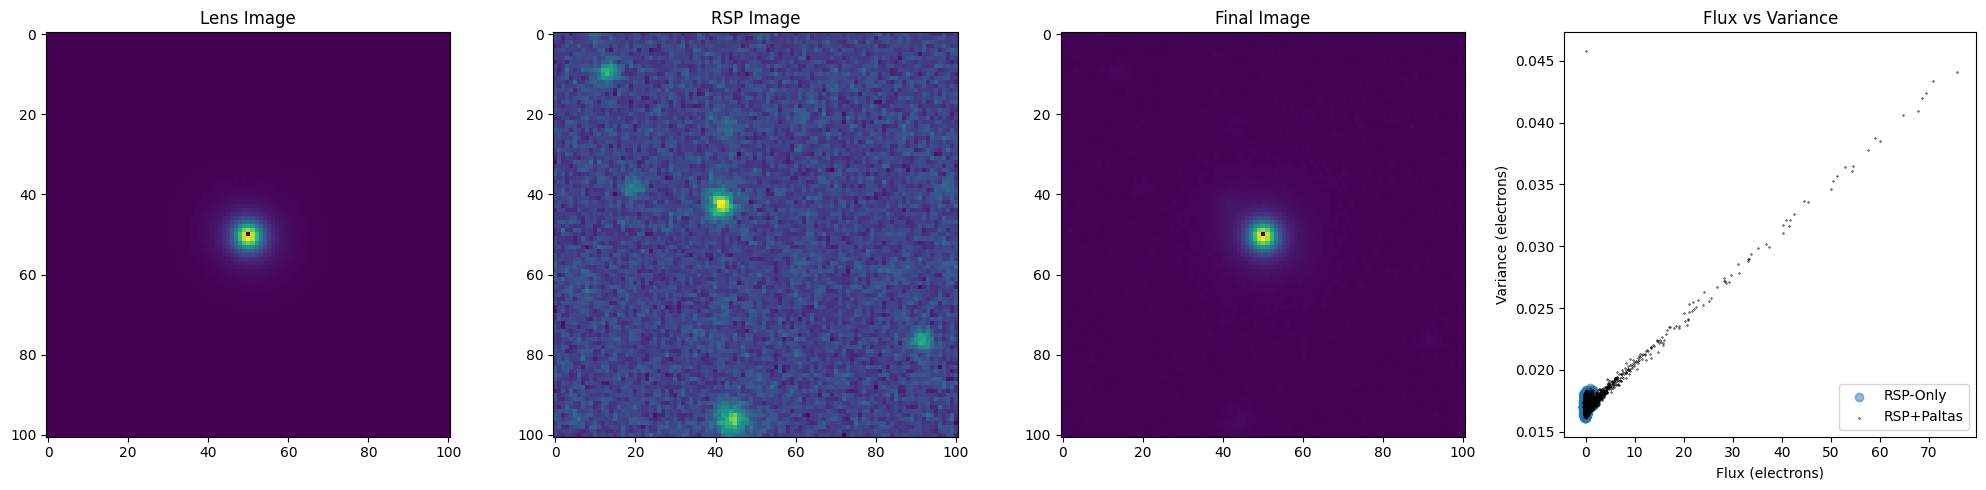

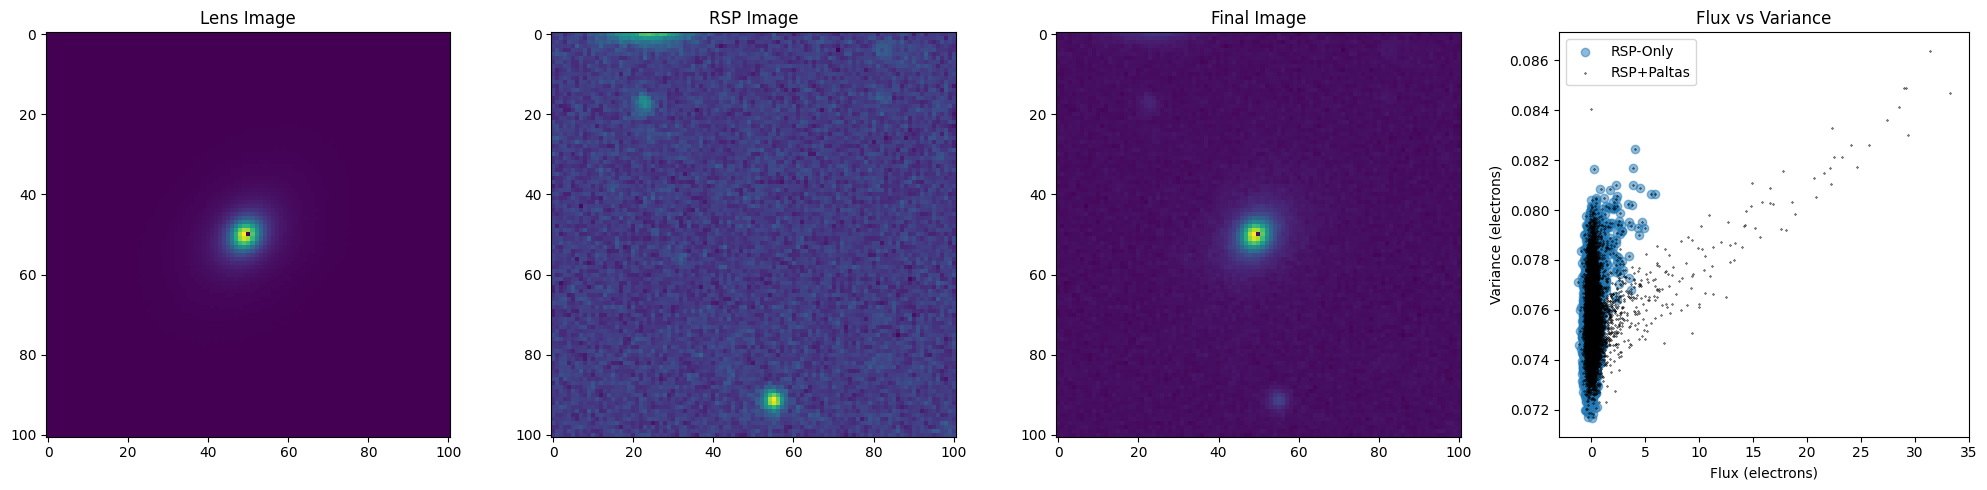

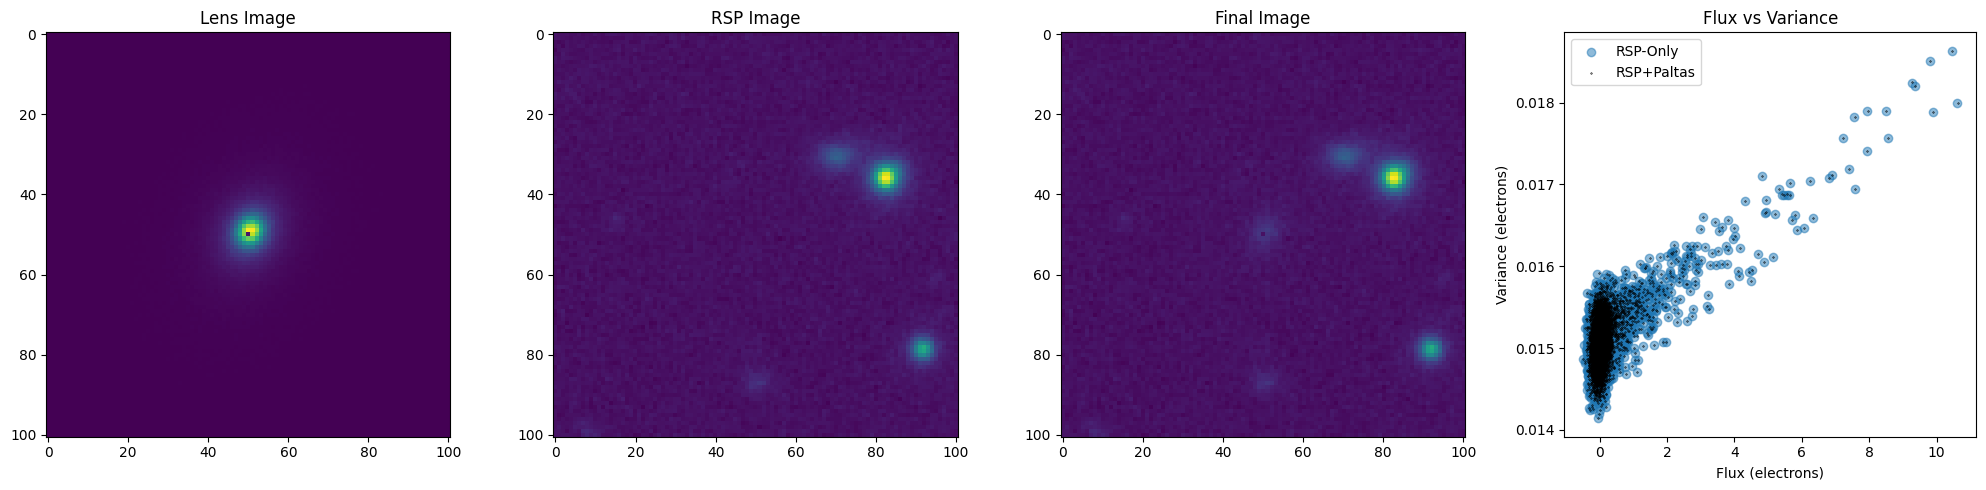

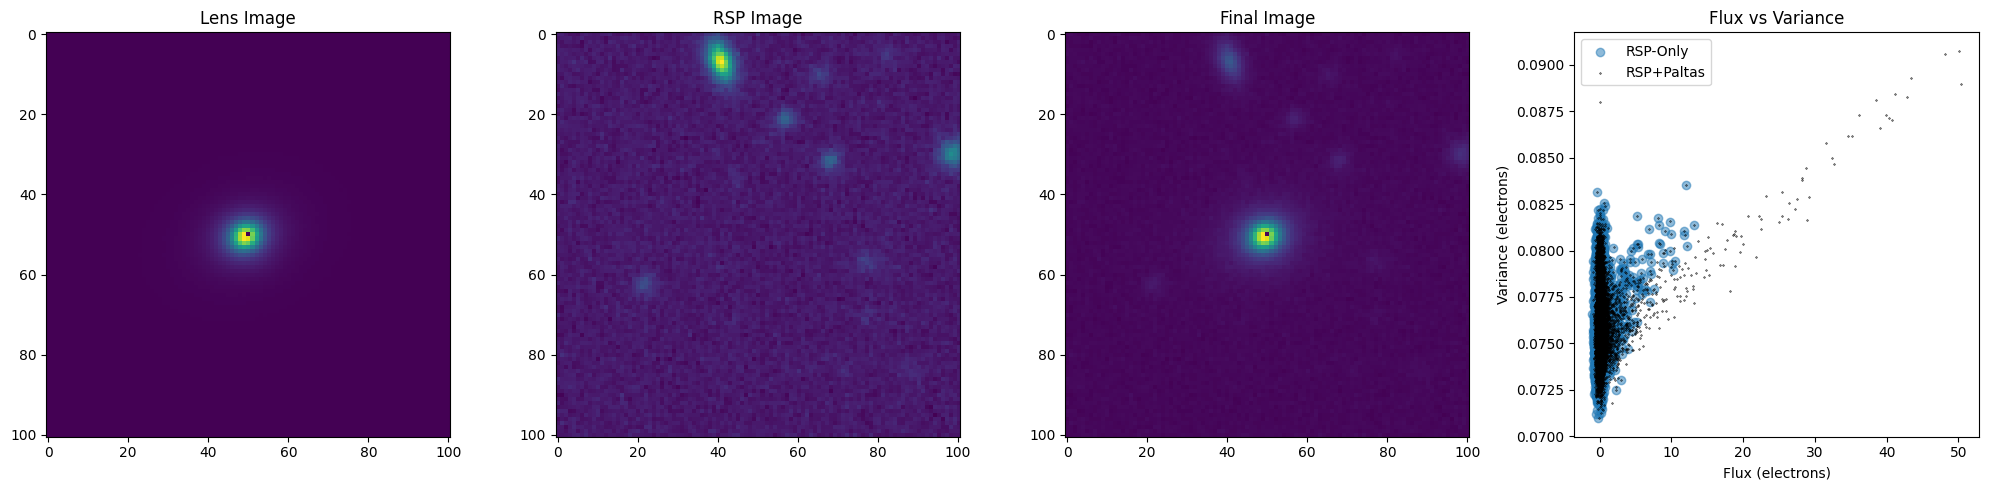

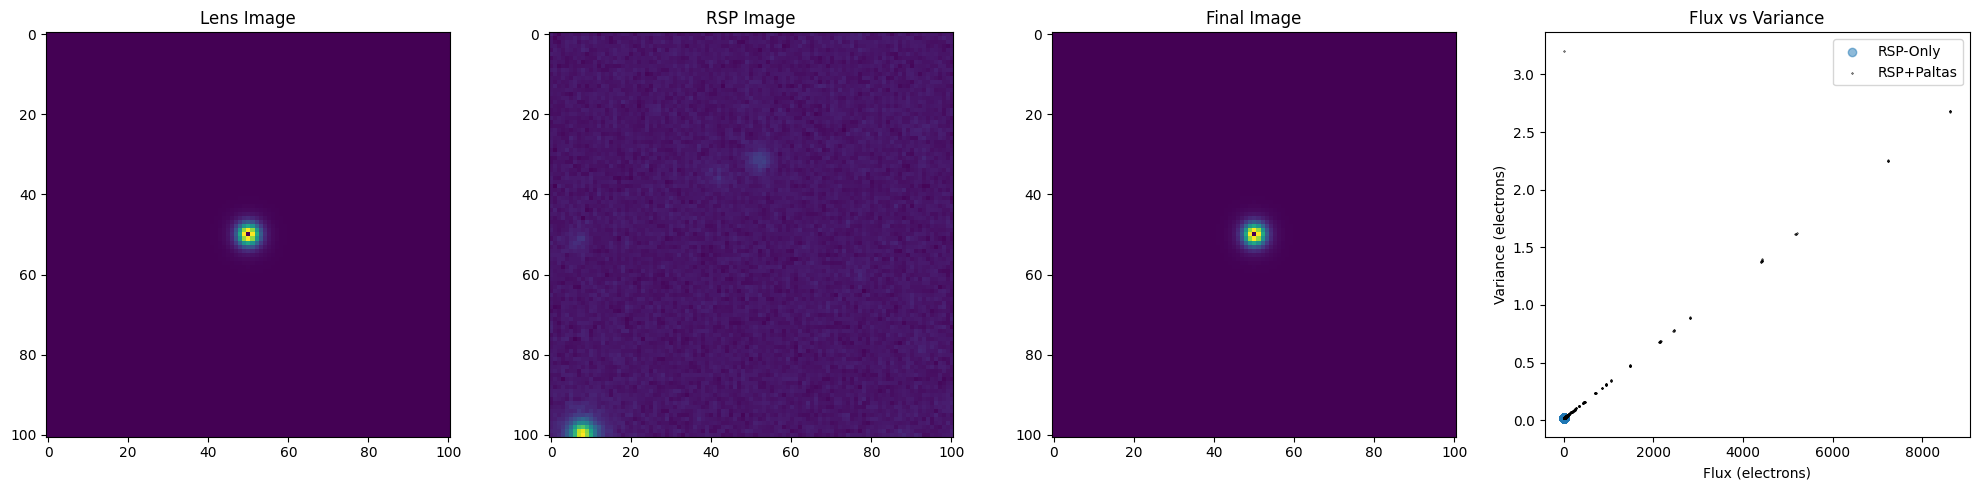

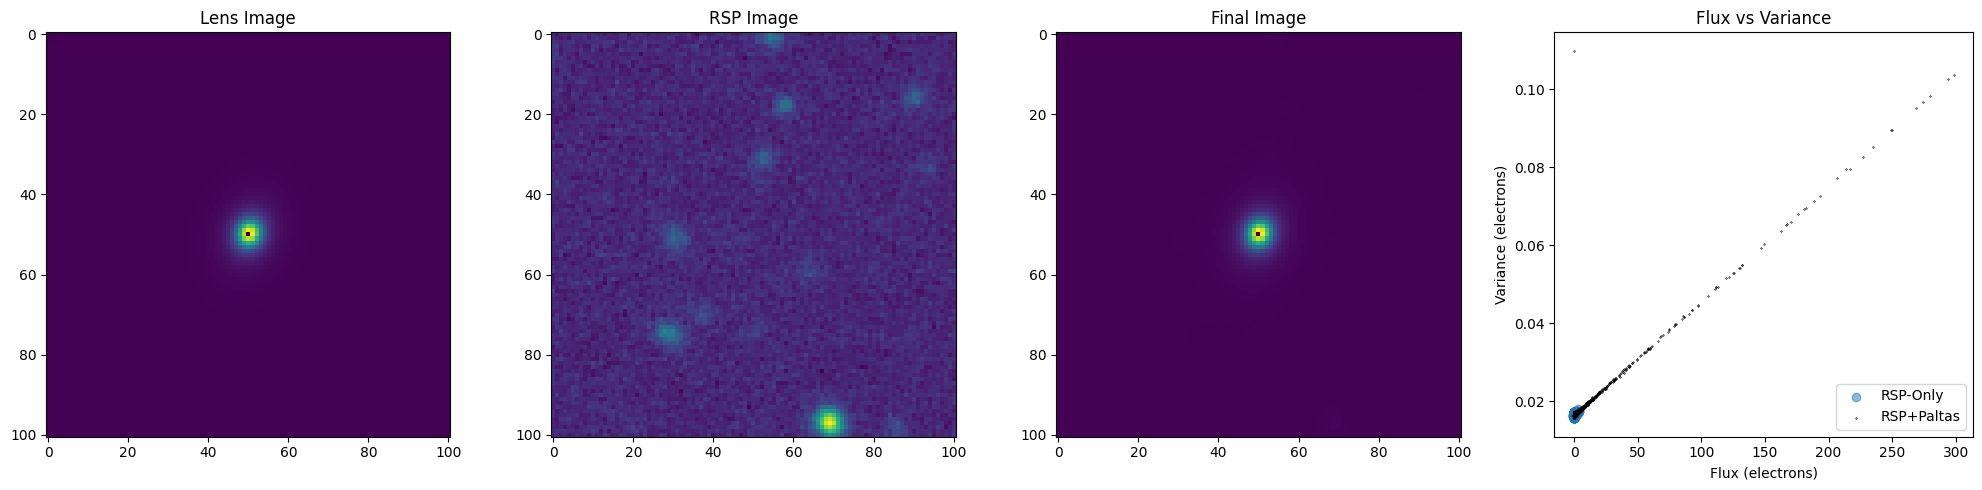

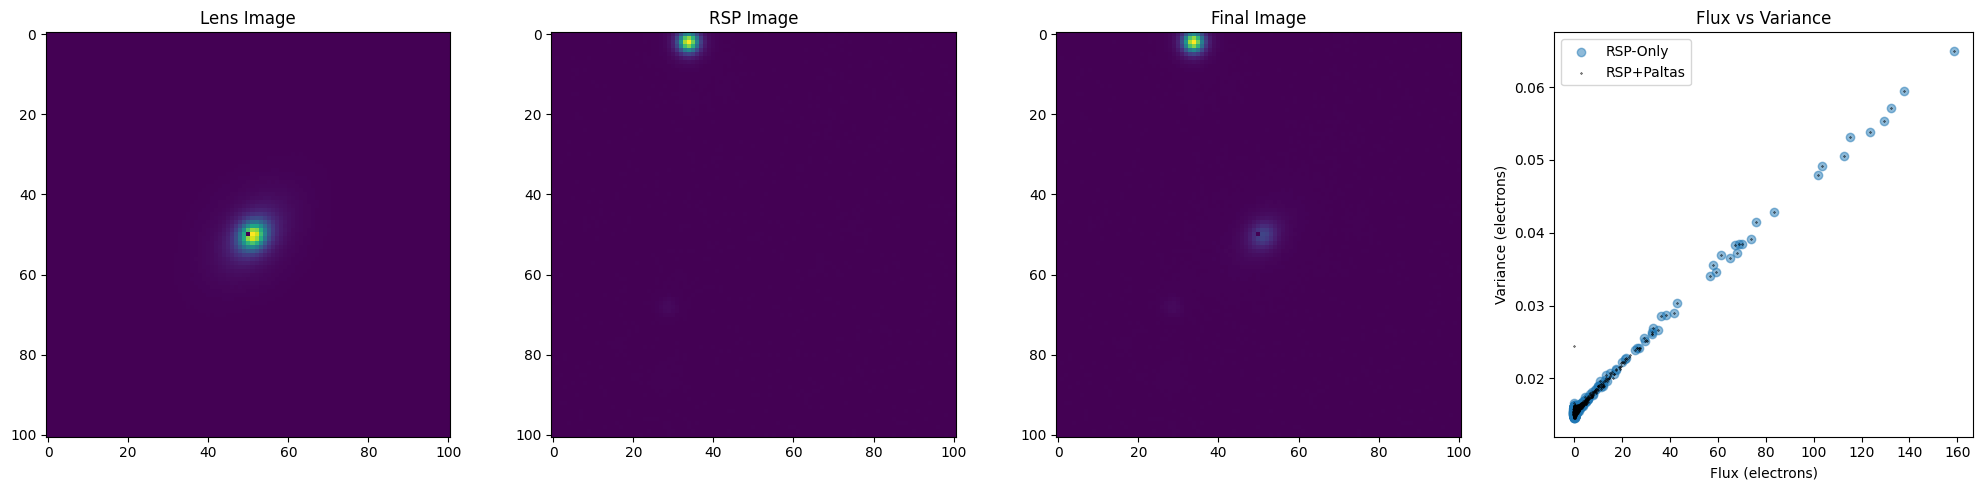

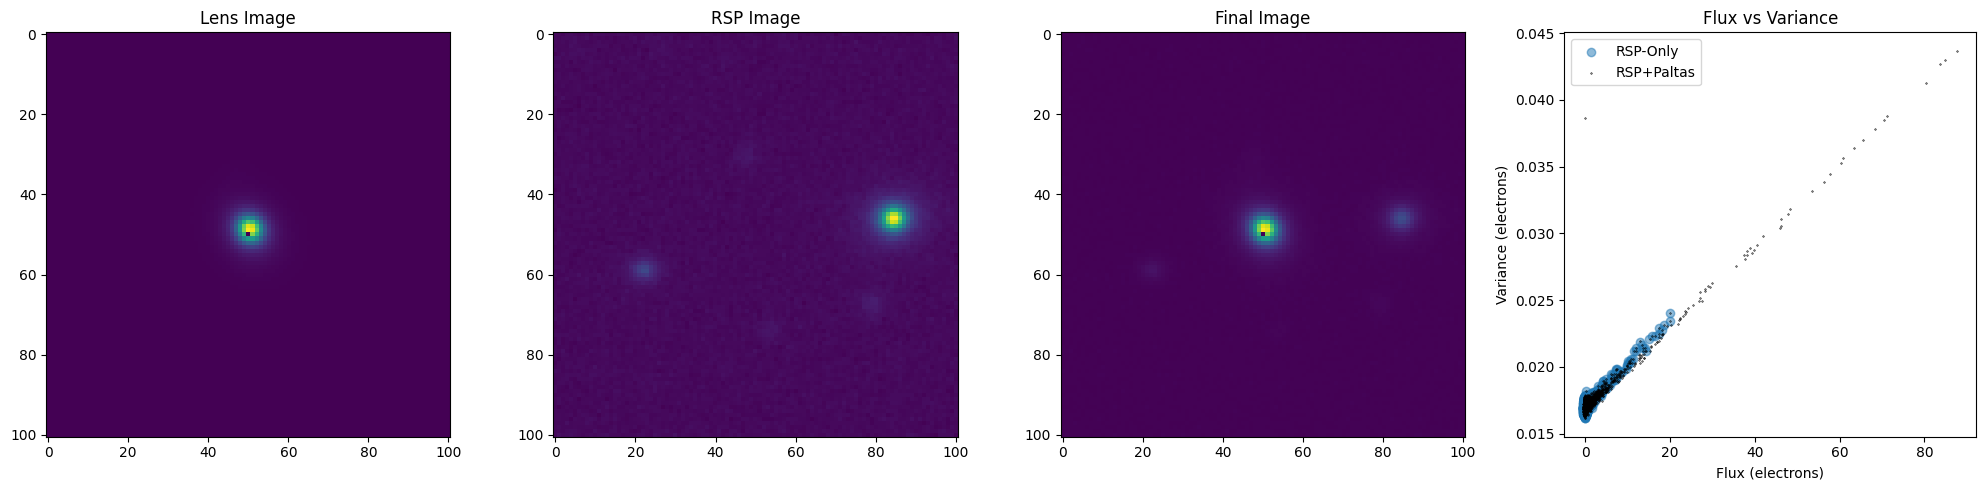

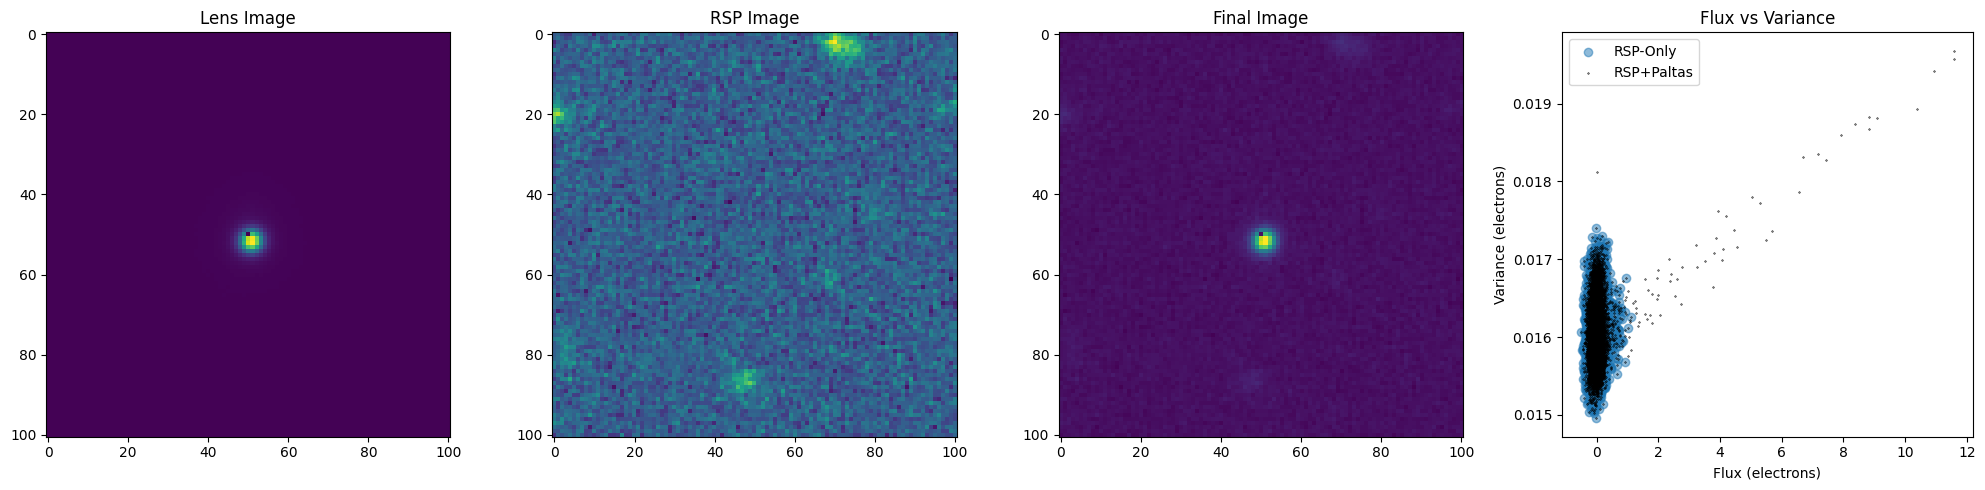

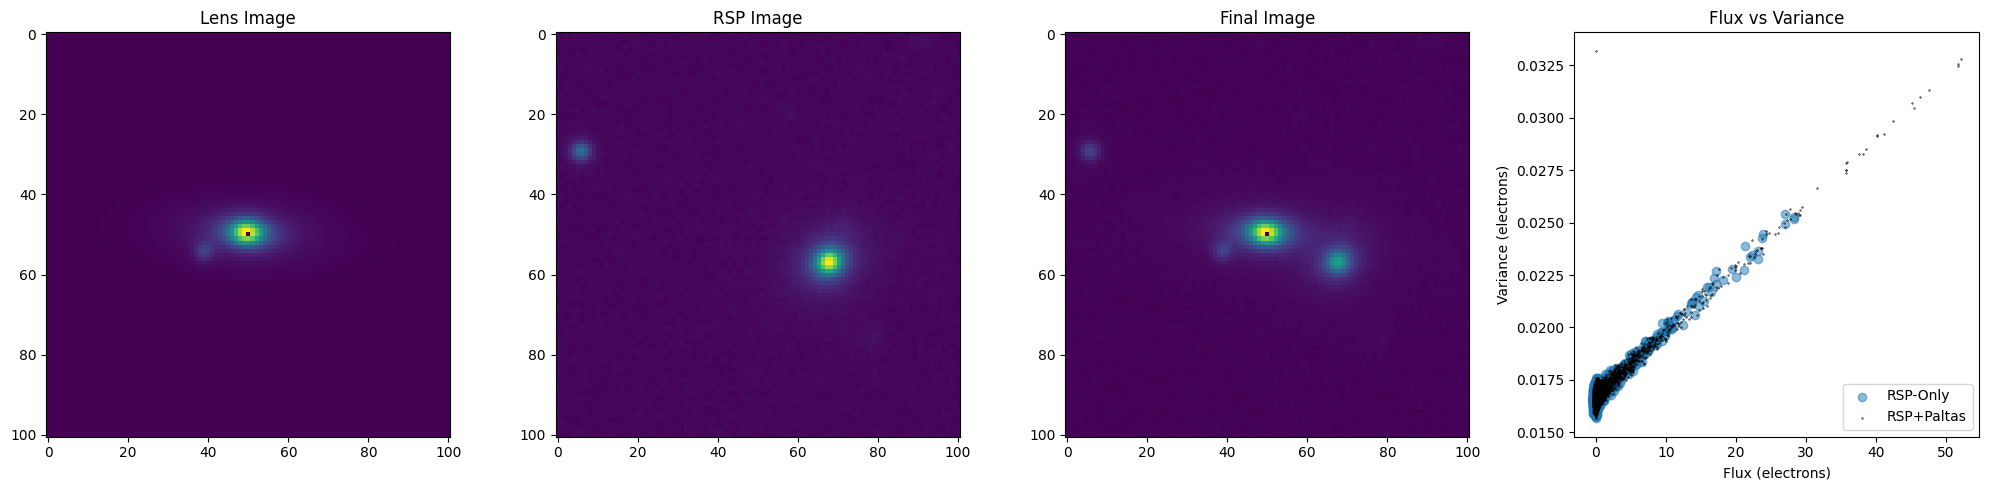

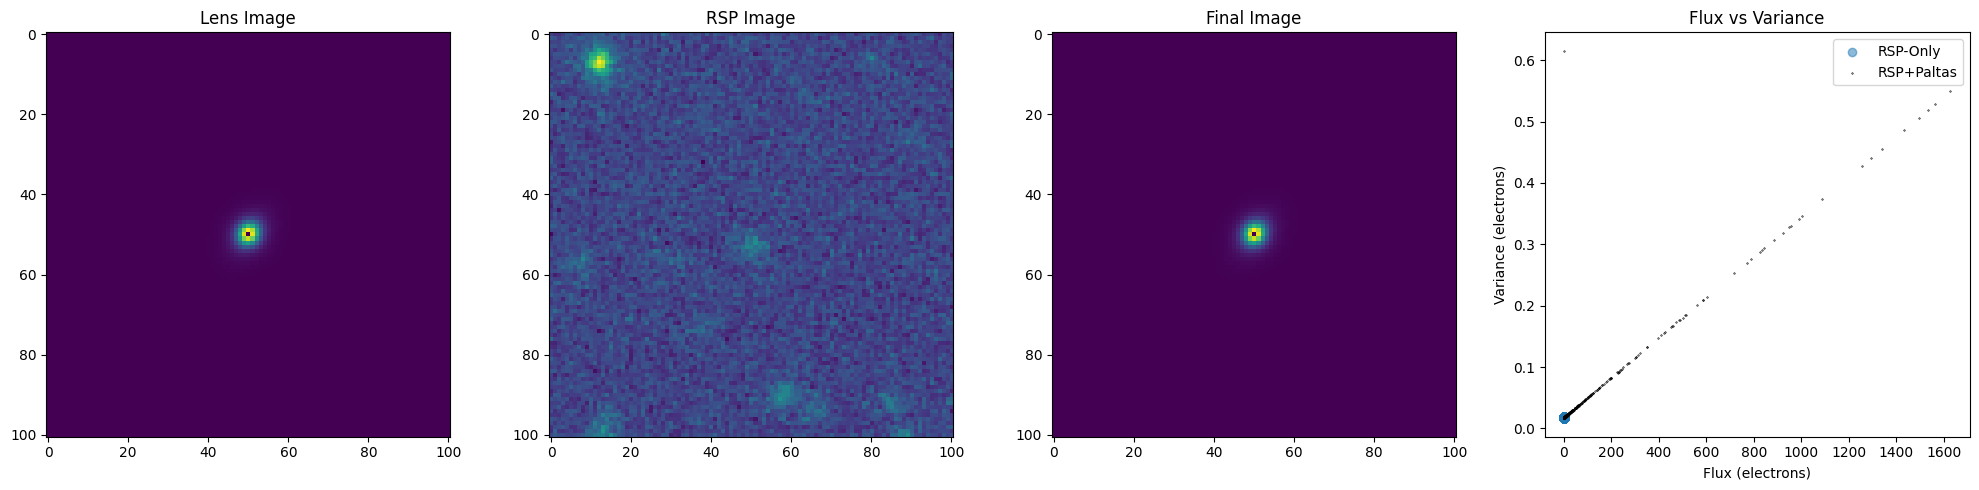

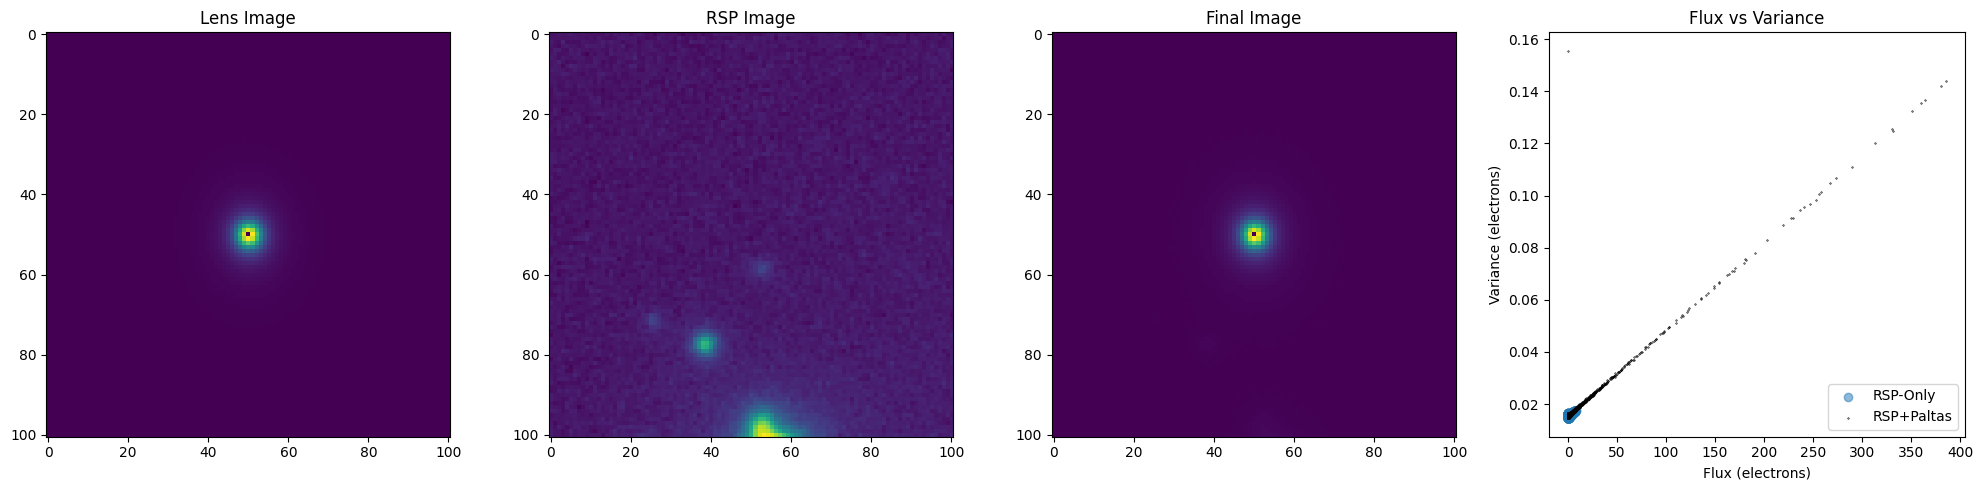

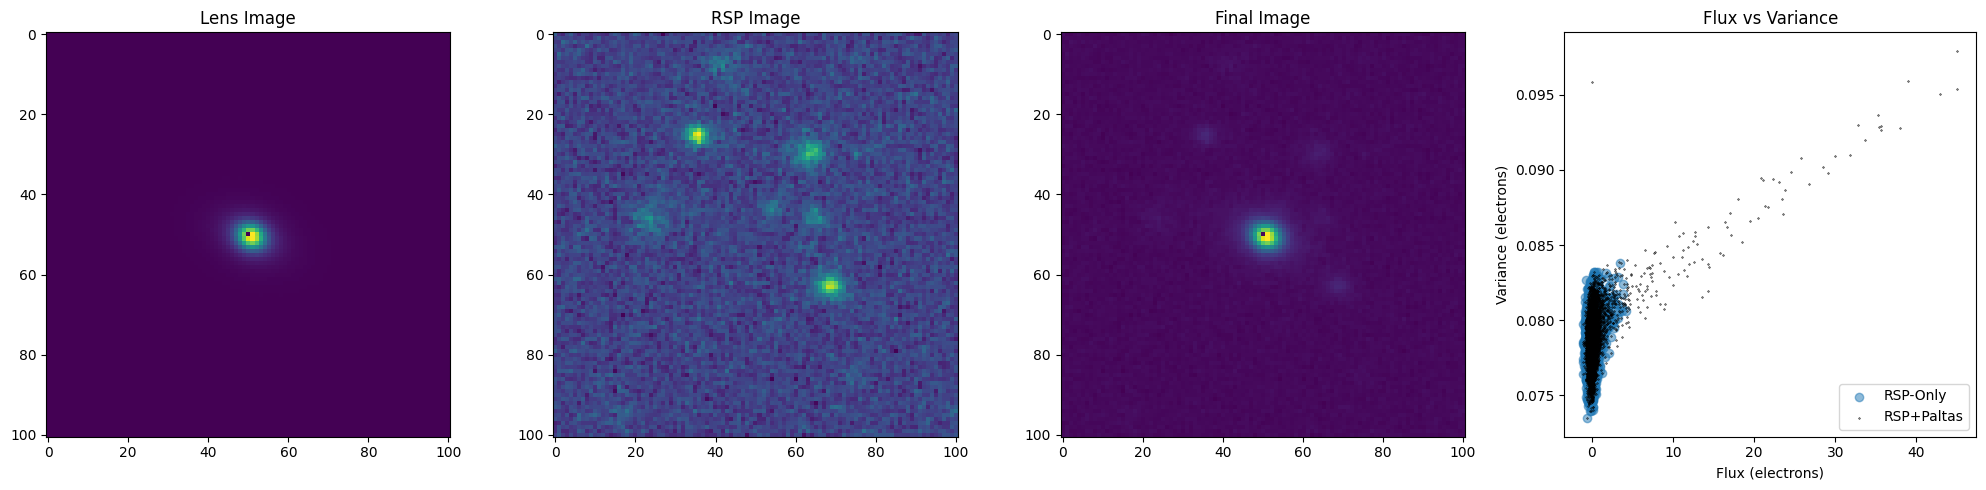

In [39]:
for n in range(20,50):
    fig,ax = pl.subplots(1,4,figsize=(20,5))
    im = np.load(f'/mnt/zfsusers/hollowayp/paltas/image_00000{n}.npy')
    noise = np.load(f'/mnt/zfsusers/hollowayp/paltas/noise_00000{n}.npy')
    #RSP, RSP_VAR, IM, VAR.
    ax[0].imshow(im-noise[0,:,:])
    ax[0].set_title('Lens Image')
    ax[1].imshow(noise[0,:,:])
    ax[1].set_title('RSP Image')
    ax[2].imshow(im)
    ax[2].set_title('Final Image')
    ax[3].scatter(noise[0,:,:].flatten(),noise[1,:,:].flatten(),alpha=0.5,label='RSP-Only',)
    ax[3].scatter(noise[2,:,:].flatten(),noise[3,:,:].flatten(),marker='x',alpha=0.5,
                  c='k',label='RSP+Paltas',s=1)
    ax[3].set_title('Flux vs Variance')
    ax[3].set_xlabel('Flux (electrons)')
    ax[3].set_ylabel('Variance (electrons)')
    ax[3].legend()
    #ax[3].plot([0,20,40],[0,np.sqrt(20*40000)/40000,np.sqrt(40*40000)/40000])
    pl.tight_layout()

pl.show()

#assert Note this is lens subtracted!!!! So wouldn't expect perfect match up unless don't do lens subtraction.